# Experiment 3: Cortical Stimulation on Treadmill (2D)

In this tutorial, we will use the `optim-neurostim` library for a 2D optimization. We will use a rat dataset, where stimuli delivered in the rat motor cortex are associated with leg muscles responses. We will optimize the xy position of the stimulation in order to maximize the motor response.

The difference with Experiment 1, is that we here simulate the conditions of our real-time optimization experiment during treadmill walking, such as performed in vivo in our paper.

## Step 1: Download dependencies

In [1]:
from IPython.display import Image, display
from PIL import Image as PIL_Image
import pickle
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
font = {'size': 16} 
matplotlib.rc('font', **font)

In [2]:
%cd ..

/Users/uzaymacar/Desktop/EduOptimNeurostimDev


In [1]:
#!pip install GPy

     |████████████████████████████████| 959 kB 4.4 MB/s 
     |████████████████████████████████| 71 kB 6.6 MB/s 
  Created wheel for GPy: filename=GPy-1.10.0-cp37-cp37m-linux_x86_64.whl size=2565061 sha256=3e8d94134b0c9bf3b1cf9f5f540a618c9a6fc7a244c1783166382705c9c78743
  Stored in directory: /root/.cache/pip/wheels/f7/18/28/dd1ce0192a81b71a3b086fd952511d088b21e8359ea496860a
  Created wheel for paramz: filename=paramz-0.9.5-py3-none-any.whl size=102566 sha256=8900ae3a28bb9295b402998b1360cfc583f78f0ed4074c3f58852873ebe95d18
  Stored in directory: /root/.cache/pip/wheels/c8/95/f5/ce28482da28162e6028c4b3a32c41d147395825b3cd62bc810
Successfully built GPy paramz
Cloning into 'EduOptimNeurostimDev'...
remote: Enumerating objects: 158, done.
remote: Counting objects: 100% (158/158), done.
remote: Compressing objects: 100% (91/91), done.
remote: Total 158 (delta 85), reused 133 (delta 63), pack-reused 0
Receiving objects: 100% (158/158), 35.60 KiB | 4.45 MiB/s, done.
Resolving deltas: 100% (85

## Step 2: Download the dataset

In [2]:
!bash scripts/download_nhp_rat_dataset.sh data

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   469  100   469    0     0   3635      0 --:--:-- --:--:-- --:--:--  3607
100  141M  100  141M    0     0  64.2M      0  0:00:02  0:00:02 --:--:--  123M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   469  100   469    0     0   5517      0 --:--:-- --:--:-- --:--:--  5517
100  111M  100  111M    0     0  60.7M      0  0:00:01  0:00:01 --:--:--  114M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   469  100   469    0     0   3782      0 --:--:-- --:--:-- --:--:--  3813
100 71.1M  100 71.1M    0     0  45.2M      0  0:00:01  0:00:01 --:--:--  121M
  % Total    % Received % Xferd  Average Speed   Tim

## Step 3: Configuration file

In `optim-neurostim`, the training is orchestrated by a configuration file, a JSON file containing all the necessary parameters. Some examples of configuration files are available in the `optim-neurostim/examples/` folder.

In this tutorial for Experiment 2, we will be using the configuration file: `optim-neurostim/examples/rat_mapping_treadmill_2D.json`. This is already downloaded for you in `config` (📁).

Open this file and follow on for more information on some of the key parameters for performing the 2D rat mapping:

1. `seed` - The random seed for the experiment which enables reproducibility. We use `0` throughout all experiments.
> `"seed": 0`

2. `output_path` - The name of the folder that will be populated by the output files (e.g. the trained object, relevant plots, etc.)
> `"path_output": "output/rat_mapping_treadmill_2D"`

3. `prior:path` - The path to the prior object (`.mat`). We released a few prior objects for experimentation purposes and to speed-up training and these can be found under the `optim-neurostim/priors/` folder. In this experiment, we don't utilize any prior so we leave it empty.
> `"path": null`

4. `data:dataset_path` - The location to the dataset.
> `"dataset_path": "data/rat"`

5. `acquisition:kappa:values` - The values to assess in hyperparameter optimization for UCB acquisition function's kappa parameter.
> `"values": [1.0, 1.5, 2, 2.3, 2.6, 2.9, 3.2, 3.5, 3.8, 4.1, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]`

6. `acquisition:kappa:find_best` - Setting this parameter to true will enable hyperparameter optimization for the corresponding hyperparameter, e.g. `kappa` for this case.
> `"find_best": true`

7. `optimization:name` - The name of the optimization algorithm, which should be one of `gpbo`, `extensive`, or `greedy`. For this experiment, we will show GPBO.
> `"name": "gpbo"`

8. `optimization:n_repetitions` - Number of repetitions for the optimization algorithm.
> `"n_repetitions": 30`


## (Optional) Step 4: Play around with parameters

Optionally, you can open `examples/rat_mapping_treadmill_2D.json` and manually change any parameter you want before running the experiment. You can even create a config file from scratch if you wish to explore further!

## Step 5: Run optimization on one new animal

Using the given config file and given that the best hyperparameter value for `kappa` is $3.0$, let's first run optimization on one new animal. We do this by passing `"{'kappa': 3.0}"` or equivalently `output/rat_mapping_2D/best_hyperparams.pkl` (i.e. path to the trained hyperparameter object) to the `-hp` flag.

In [15]:
!python main.py -c config/rat_mapping_treadmill_2D.json \
                -nm 1 \
                -op output/rat_mapping_treadmill_2D_one_animal \
                -hp "{'kappa': 3.0}" \
                -val 

Iterating over repetitions:  93%|██████████████ | 28/30 [00:43<00:03,  1.68s/it] main.py:173: RuntimeWarning:invalid value encountered in sqrt
Hooray! Succesfully saved output files to output/rat_mapping_treadmill_2D_one_animal.


We can quickly check the performance through the saved CSV file.

In [16]:
df_gpbo = pd.read_csv('output/rat_mapping_treadmill_2D_one_animal/gpbo_performance.csv', index_col='queries')
df_gpbo = df_gpbo[['exploration', 'exploitation']].T
df_gpbo

queries,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
exploration,0.29337,0.325044,0.336676,0.338038,0.331825,0.330695,0.336610,0.387678,0.440345,0.472242,...,0.742620,0.765467,0.770310,0.763287,0.783868,0.788043,0.782468,0.807468,0.814249,0.807361
exploitation,0.29337,0.319755,0.318224,0.308229,0.291501,0.300737,0.285875,0.341532,0.343213,0.332772,...,0.698462,0.694767,0.737807,0.720993,0.782712,0.760949,0.785979,0.807214,0.806744,0.781078


Let's see what the `y_mu_mapped` looks like. This is the output of GP, `y_mu`, mapped to the dimensions of the problem. 

(8, 4)


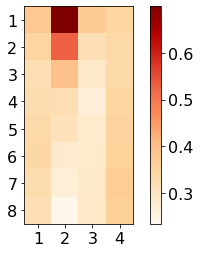

In [17]:
y_mu_mapped_arr = np.squeeze(np.load('output/rat_mapping_treadmill_2D_one_animal/y_mu_mapped_arr.npy'))
print(y_mu_mapped_arr.shape)  
# NOTE: y_mu_mapped_arr is in shape (num_hyperparams, num_muscles, *system_shape) or (*system.shape) if squeeze-able
plt.xticks(range(10), range(1, 11))
plt.yticks(range(10), range(1, 11))
plt.imshow(y_mu_mapped_arr, cmap='OrRd')
plt.colorbar()
plt.show()

Let's see what algorithmic performance vs. num. queries looks like. This is essentially the same as the CSV above, but plotted nicely.

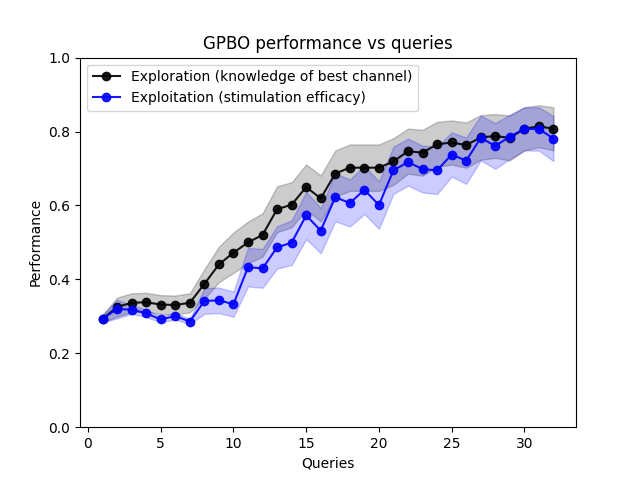

In [18]:
display(Image('output/rat_mapping_treadmill_2D_one_animal/performance_vs_queries.png'))

Now, let's run the same pipeline, but using the **extensive** search algorithm instead of the **GPBO** search algorithm as employed before.

In [19]:
!python main.py -c config/rat_mapping_treadmill_2D.json \
                -nm 1 \
                -alg extensive \
                -op output/rat_mapping_treadmill_2D_one_animal_extensive \
                -hp "{'kappa': 3.0}" \
                -val 

Hooray! Succesfully saved output files to output/rat_mapping_treadmill_2D_one_animal_extensive.


We can quickly check the performance through the saved CSV file.

In [20]:
df_extensive = pd.read_csv('output/rat_mapping_treadmill_2D_one_animal_extensive/extensive_performance.csv', index_col='queries')
df_extensive = df_extensive[['exploration', 'exploitation']].T
df_extensive

queries,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
exploration,0.295695,0.313661,0.351175,0.393815,0.415644,0.463988,0.485978,0.487255,0.487295,0.517124,...,0.744710,0.736802,0.741128,0.767329,0.765341,0.767151,0.763911,0.786576,0.794563,0.819037
exploitation,0.295695,0.304891,0.323512,0.321446,0.320858,0.351917,0.302699,0.289124,0.293491,0.330964,...,0.285762,0.291557,0.298964,0.309563,0.324196,0.292438,0.314207,0.331169,0.294578,0.370550


Let's see what algorithmic performance vs. num. queries looks like. This is essentially the same as the CSV above, but plotted nicely.

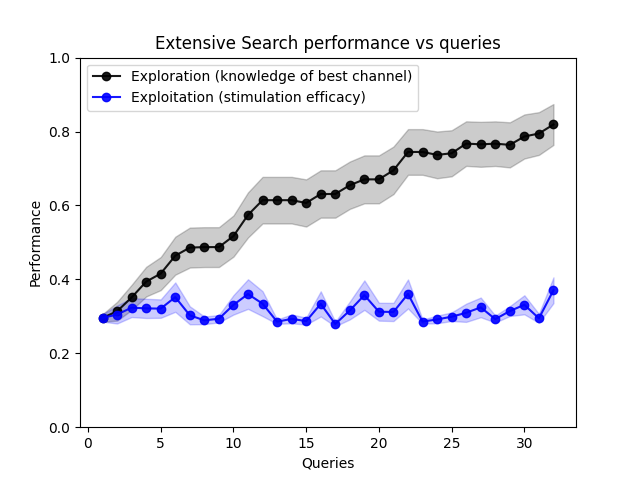

In [21]:
display(Image('output/rat_mapping_treadmill_2D_one_animal_extensive/performance_vs_queries.png'))

Now, let's run the same pipeline, but using the **greedy** search algorithm instead of the **GPBO** search algorithm as employed before.

In [22]:
!python main.py -c config/rat_mapping_treadmill_2D.json \
                -nm 1 \
                -alg greedy \
                -op output/rat_mapping_treadmill_2D_one_animal_greedy \
                -hp "{'kappa': 3.0}" \
                -val

Hooray! Succesfully saved output files to output/rat_mapping_treadmill_2D_one_animal_greedy.


In [23]:
df_greedy = pd.read_csv('output/rat_mapping_treadmill_2D_one_animal_greedy/greedy_performance.csv', index_col='queries')
df_greedy = df_greedy[['exploration', 'exploitation']].T
df_greedy

queries,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
exploration,0.292149,0.306559,0.312227,0.343402,0.354949,0.386402,0.432064,0.444382,0.444019,0.437367,...,0.547479,0.54864,0.554345,0.545811,0.546234,0.546763,0.546763,0.547847,0.574510,0.574510
exploitation,0.292149,0.301438,0.279035,0.314292,0.337171,0.316907,0.364467,0.336988,0.294102,0.309960,...,0.297366,0.30021,0.326088,0.292728,0.292655,0.317900,0.322717,0.280599,0.308946,0.310913


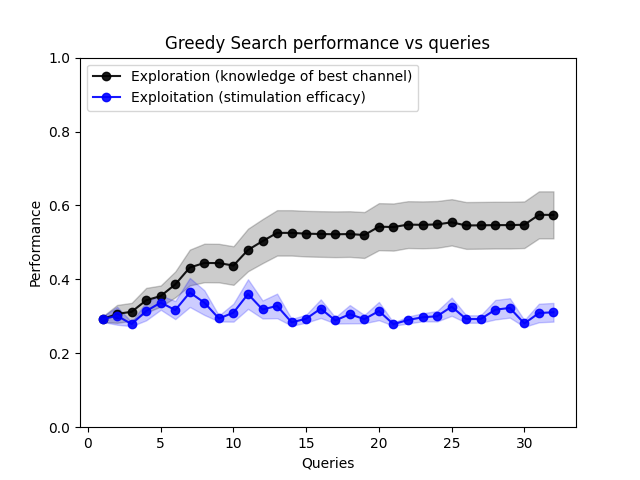

In [24]:
display(Image('output/rat_mapping_treadmill_2D_one_animal_greedy/performance_vs_queries.png'))

Finally, we can compare the two algorithms on the same plot for (i) exploration and (ii) exploitation using the command given below.

In [25]:
!python scripts/compare_and_plot.py -r1 output/rat_mapping_treadmill_2D_one_animal \
                                    -r2 output/rat_mapping_treadmill_2D_one_animal_extensive \
                                    -r3 output/rat_mapping_treadmill_2D_one_animal_greedy

Hooray! Successfully compared and plotted the two runs!


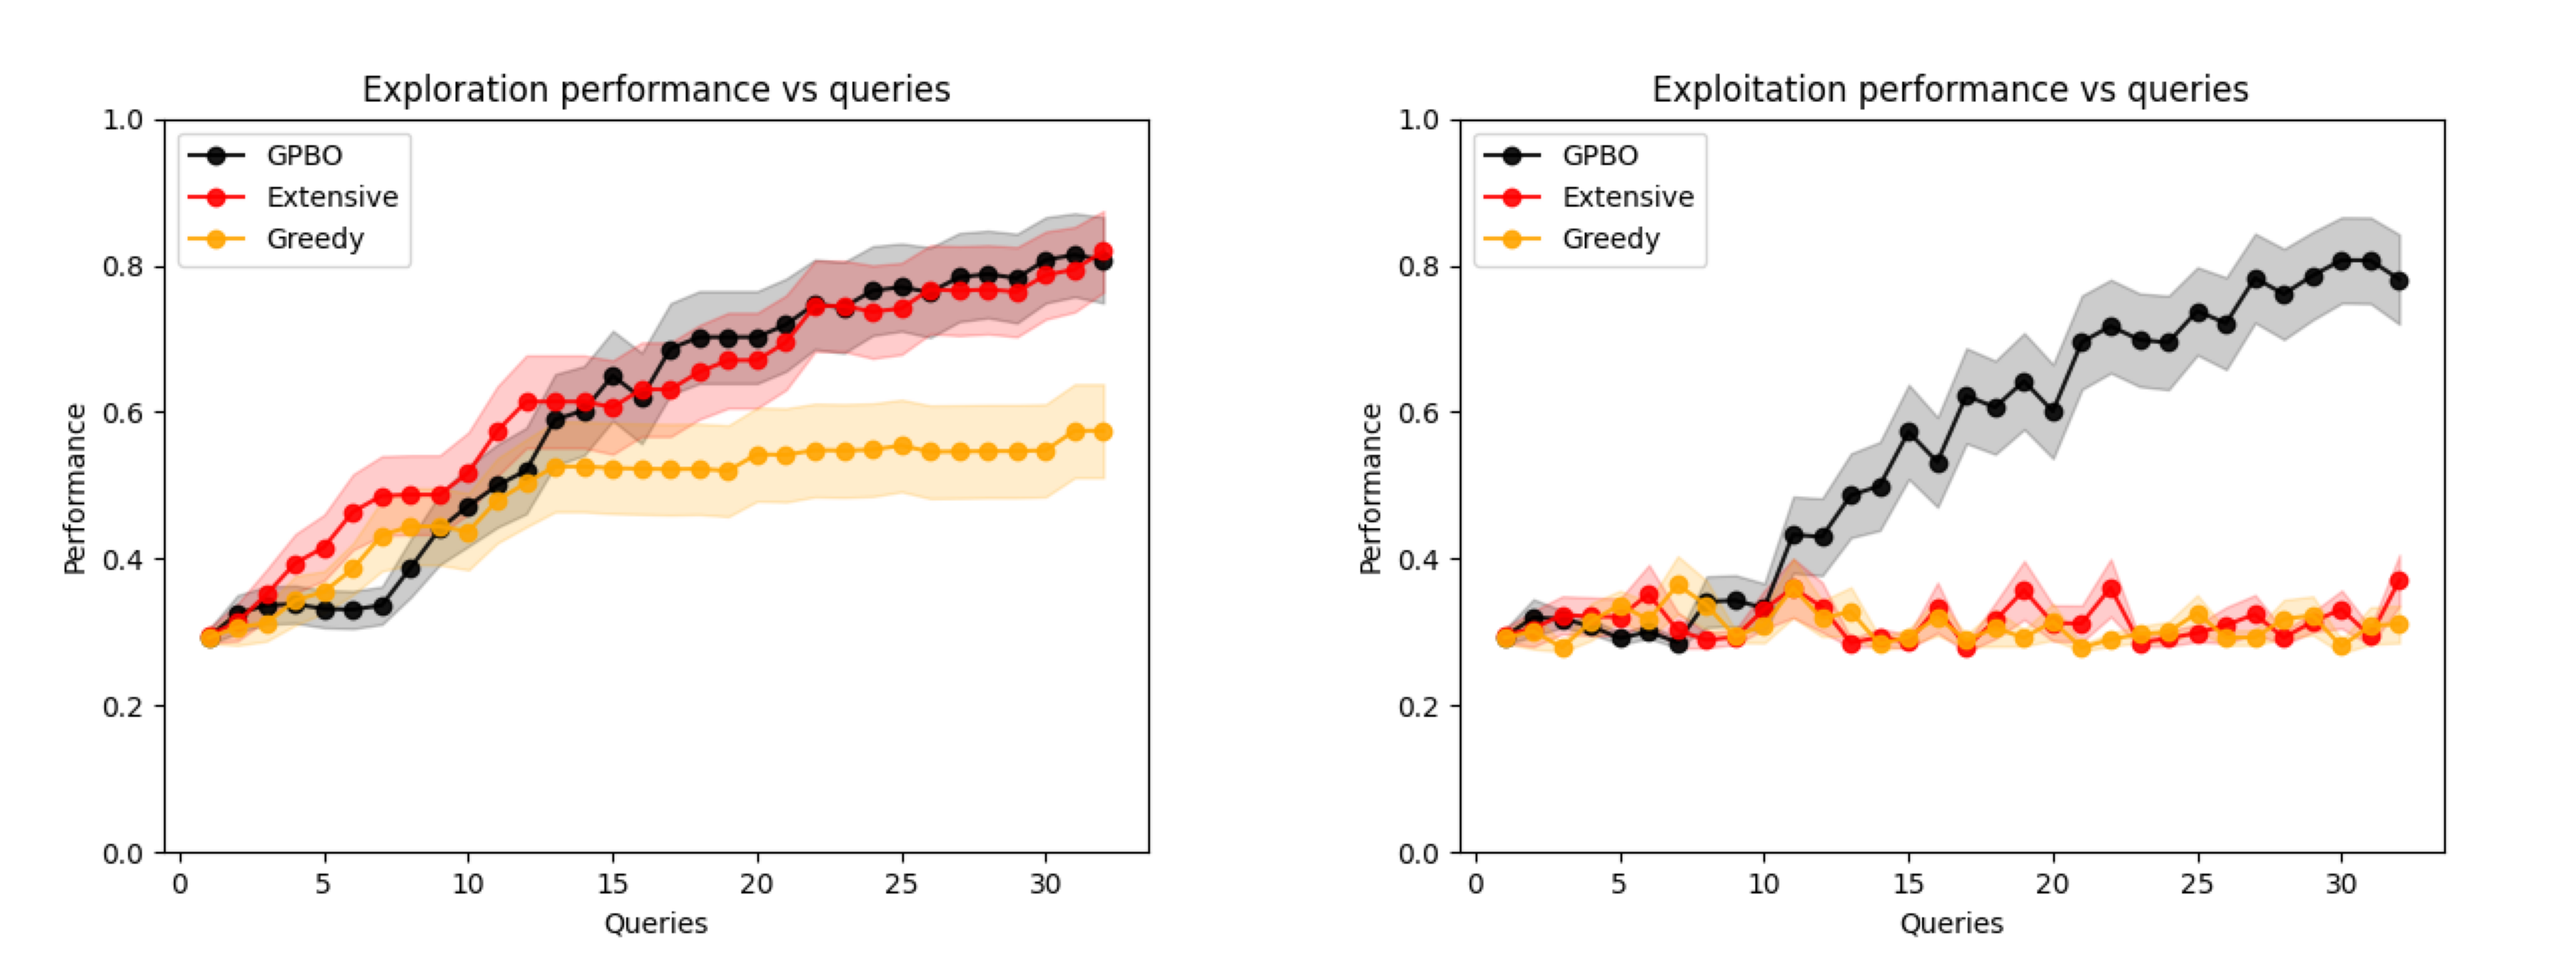

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(50, 30), constrained_layout=True)
ax[0].imshow(PIL_Image.open('output/rat_mapping_treadmill_2D_one_animal/exploration_comparison.png'))
ax[0].axis('off')
ax[1].imshow(PIL_Image.open('output/rat_mapping_treadmill_2D_one_animal/exploitation_comparison.png'))
ax[1].axis('off')
plt.show()

## Step 6: Run optimization on several validation replicates

We now do the same, but with several validation replicates.

In [27]:
!python main.py -c config/rat_mapping_treadmill_2D.json \
                -nm 10 \
                -op output/rat_mapping_treadmill_2D_several_animals \
                -hp "{'kappa': 3.0}" \
                -val

Iterating over repetitions:  93%|██████████████ | 28/30 [00:50<00:03,  1.85s/it] main.py:173: RuntimeWarning:invalid value encountered in sqrt
Hooray! Succesfully saved output files to output/rat_mapping_treadmill_2D_several_animals.


We can quickly check the performance through the saved CSV file.

In [28]:
df_gpbo = pd.read_csv('output/rat_mapping_treadmill_2D_several_animals/gpbo_performance.csv', index_col='queries')
df_gpbo = df_gpbo[['exploration', 'exploitation']].T
df_gpbo

queries,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
exploration,0.426679,0.520965,0.594219,0.609035,0.632197,0.660979,0.673239,0.690409,0.714949,0.729616,...,0.850454,0.866666,0.868908,0.869786,0.874494,0.874402,0.877200,0.884764,0.883937,0.883626
exploitation,0.426679,0.457855,0.501810,0.414878,0.411111,0.450444,0.426954,0.479454,0.531440,0.542727,...,0.787175,0.815042,0.814366,0.836399,0.846423,0.846932,0.854408,0.871108,0.875681,0.877033


Let's first see what the `y_mu_mapped` looks like. This is the output of GP, `y_mu`, mapped to the dimensions of the problem. 

(6, 8, 4)


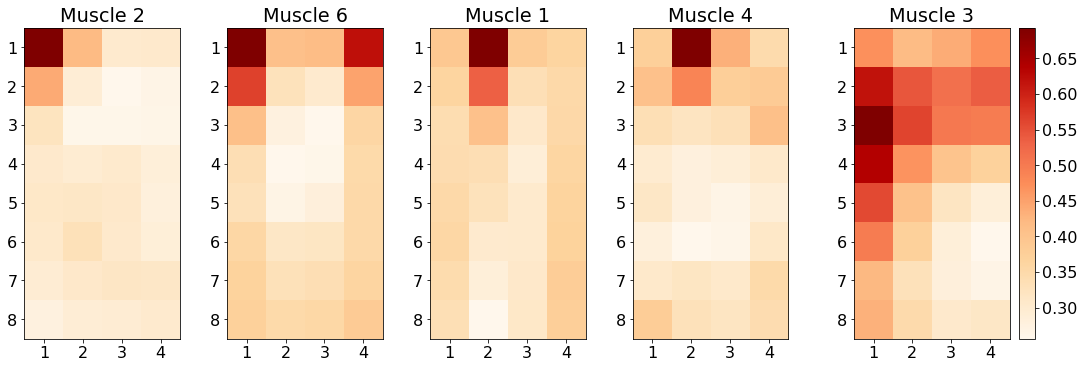

In [29]:
y_mu_mapped_arr = np.squeeze(np.load('output/rat_mapping_treadmill_2D_several_animals/y_mu_mapped_arr.npy'))
print(y_mu_mapped_arr.shape)  
# NOTE: y_mu_mapped_arr is in shape (num_hyperparams, num_muscles, *system_shape) or (*system.shape) if squeeze-able
# Show 5 muscles randomly
fig, ax = plt.subplots(1, 5, figsize=(15, 5), constrained_layout=True)
for i, muscle_index in enumerate(np.random.choice(range(y_mu_mapped_arr.shape[0]), ax.shape[0], replace=False)):
    im = ax[i].imshow(y_mu_mapped_arr[muscle_index], cmap='OrRd')
    ax[i].set_title('Muscle %d' % (muscle_index + 1))
    
plt.setp(ax, xticks=range(4), xticklabels=range(1, 5), yticks=range(8), yticklabels=range(1, 9))
fig.colorbar(im, ax=ax[-1])
plt.show()

Let's see what algorithmic performance vs. num. queries looks like. This is essentially the same as the CSV above, but plotted nicely.

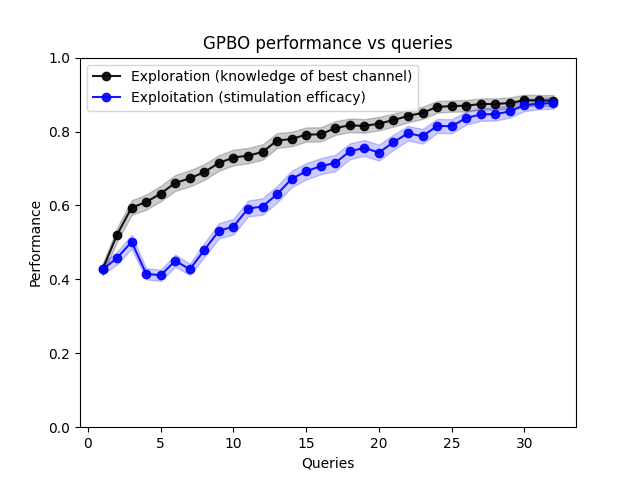

In [30]:
display(Image('output/rat_mapping_treadmill_2D_several_animals/performance_vs_queries.png'))

Now, let's run the same pipeline, but using the **extensive** search algorithm instead of the **GPBO** search algorithm as employed before.

In [31]:
!python main.py -c config/rat_mapping_treadmill_2D.json \
                -nm 10 \
                -alg extensive \
                -op output/rat_mapping_treadmill_2D_several_animals_extensive \
                -hp "{'kappa': 3.0}" \
                -val 

Hooray! Succesfully saved output files to output/rat_mapping_treadmill_2D_several_animals_extensive.


We can quickly check the performance through the saved CSV file.

In [32]:
df_extensive = pd.read_csv('output/rat_mapping_treadmill_2D_several_animals_extensive/extensive_performance.csv', index_col='queries')
df_extensive = df_extensive[['exploration', 'exploitation']].T
df_extensive

queries,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
exploration,0.422963,0.462873,0.497502,0.518863,0.552126,0.574552,0.594007,0.610462,0.618928,0.632992,...,0.759800,0.771298,0.776344,0.790857,0.812160,0.812702,0.818976,0.822497,0.828608,0.838023
exploitation,0.422963,0.406536,0.412868,0.391983,0.431949,0.418805,0.406301,0.409545,0.403719,0.415309,...,0.433039,0.431956,0.418716,0.435094,0.456439,0.399895,0.401302,0.400114,0.409609,0.422043


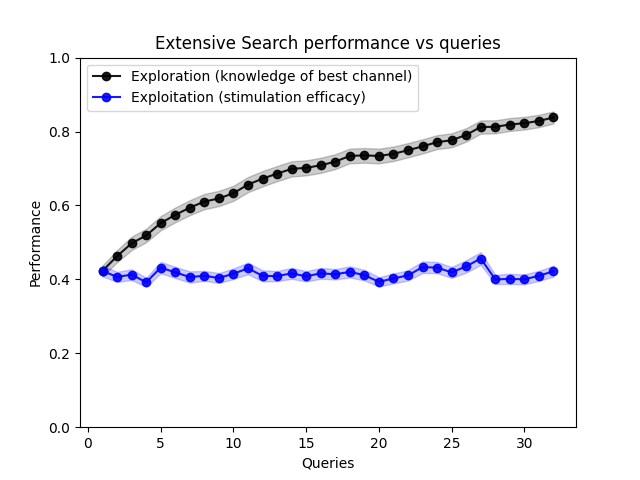

In [33]:
display(Image('output/rat_mapping_treadmill_2D_several_animals_extensive/performance_vs_queries.png'))

In [34]:
!python main.py -c config/rat_mapping_treadmill_2D.json \
                -nm 10 \
                -alg greedy \
                -op output/rat_mapping_treadmill_2D_several_animals_greedy \
                -hp "{'kappa': 3.0}" \
                -val 

Iterating over repetitions:  23%|███▋            | 7/30 [00:11<00:38,  1.66s/it] /Users/uzaymacar/anaconda3/lib/python3.7/site-packages/paramz/transformations.py:119: RuntimeWarning:overflow encountered in expm1
Hooray! Succesfully saved output files to output/rat_mapping_treadmill_2D_several_animals_greedy.


In [35]:
df_greedy = pd.read_csv('output/rat_mapping_treadmill_2D_several_animals_greedy/greedy_performance.csv', index_col='queries')
df_greedy = df_greedy[['exploration', 'exploitation']].T
df_greedy

queries,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
exploration,0.406965,0.451490,0.475177,0.498848,0.532043,0.568019,0.586241,0.586011,0.620823,0.621208,...,0.697720,0.698285,0.708887,0.713558,0.718661,0.720027,0.721256,0.722871,0.730727,0.741936
exploitation,0.406965,0.407315,0.391319,0.391611,0.448255,0.415075,0.407099,0.403104,0.463885,0.411376,...,0.418935,0.438400,0.442403,0.406633,0.411181,0.426559,0.408649,0.429250,0.448612,0.430260


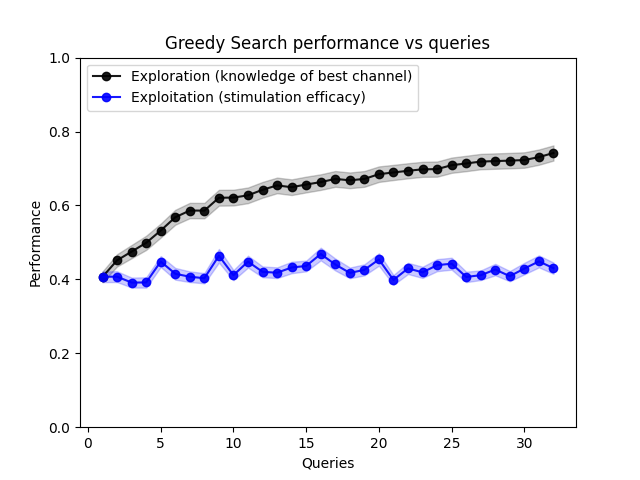

In [36]:
display(Image('output/rat_mapping_treadmill_2D_several_animals_greedy/performance_vs_queries.png'))

Finally, we can compare the two algorithms on the same plot for (i) exploration and (ii) exploitation using the command given below.

In [38]:
!python scripts/compare_and_plot.py -r1 output/rat_mapping_treadmill_2D_several_animals \
                                    -r2 output/rat_mapping_treadmill_2D_several_animals_extensive \
                                    -r3 output/rat_mapping_treadmill_2D_several_animals_greedy

Hooray! Successfully compared and plotted the two runs!


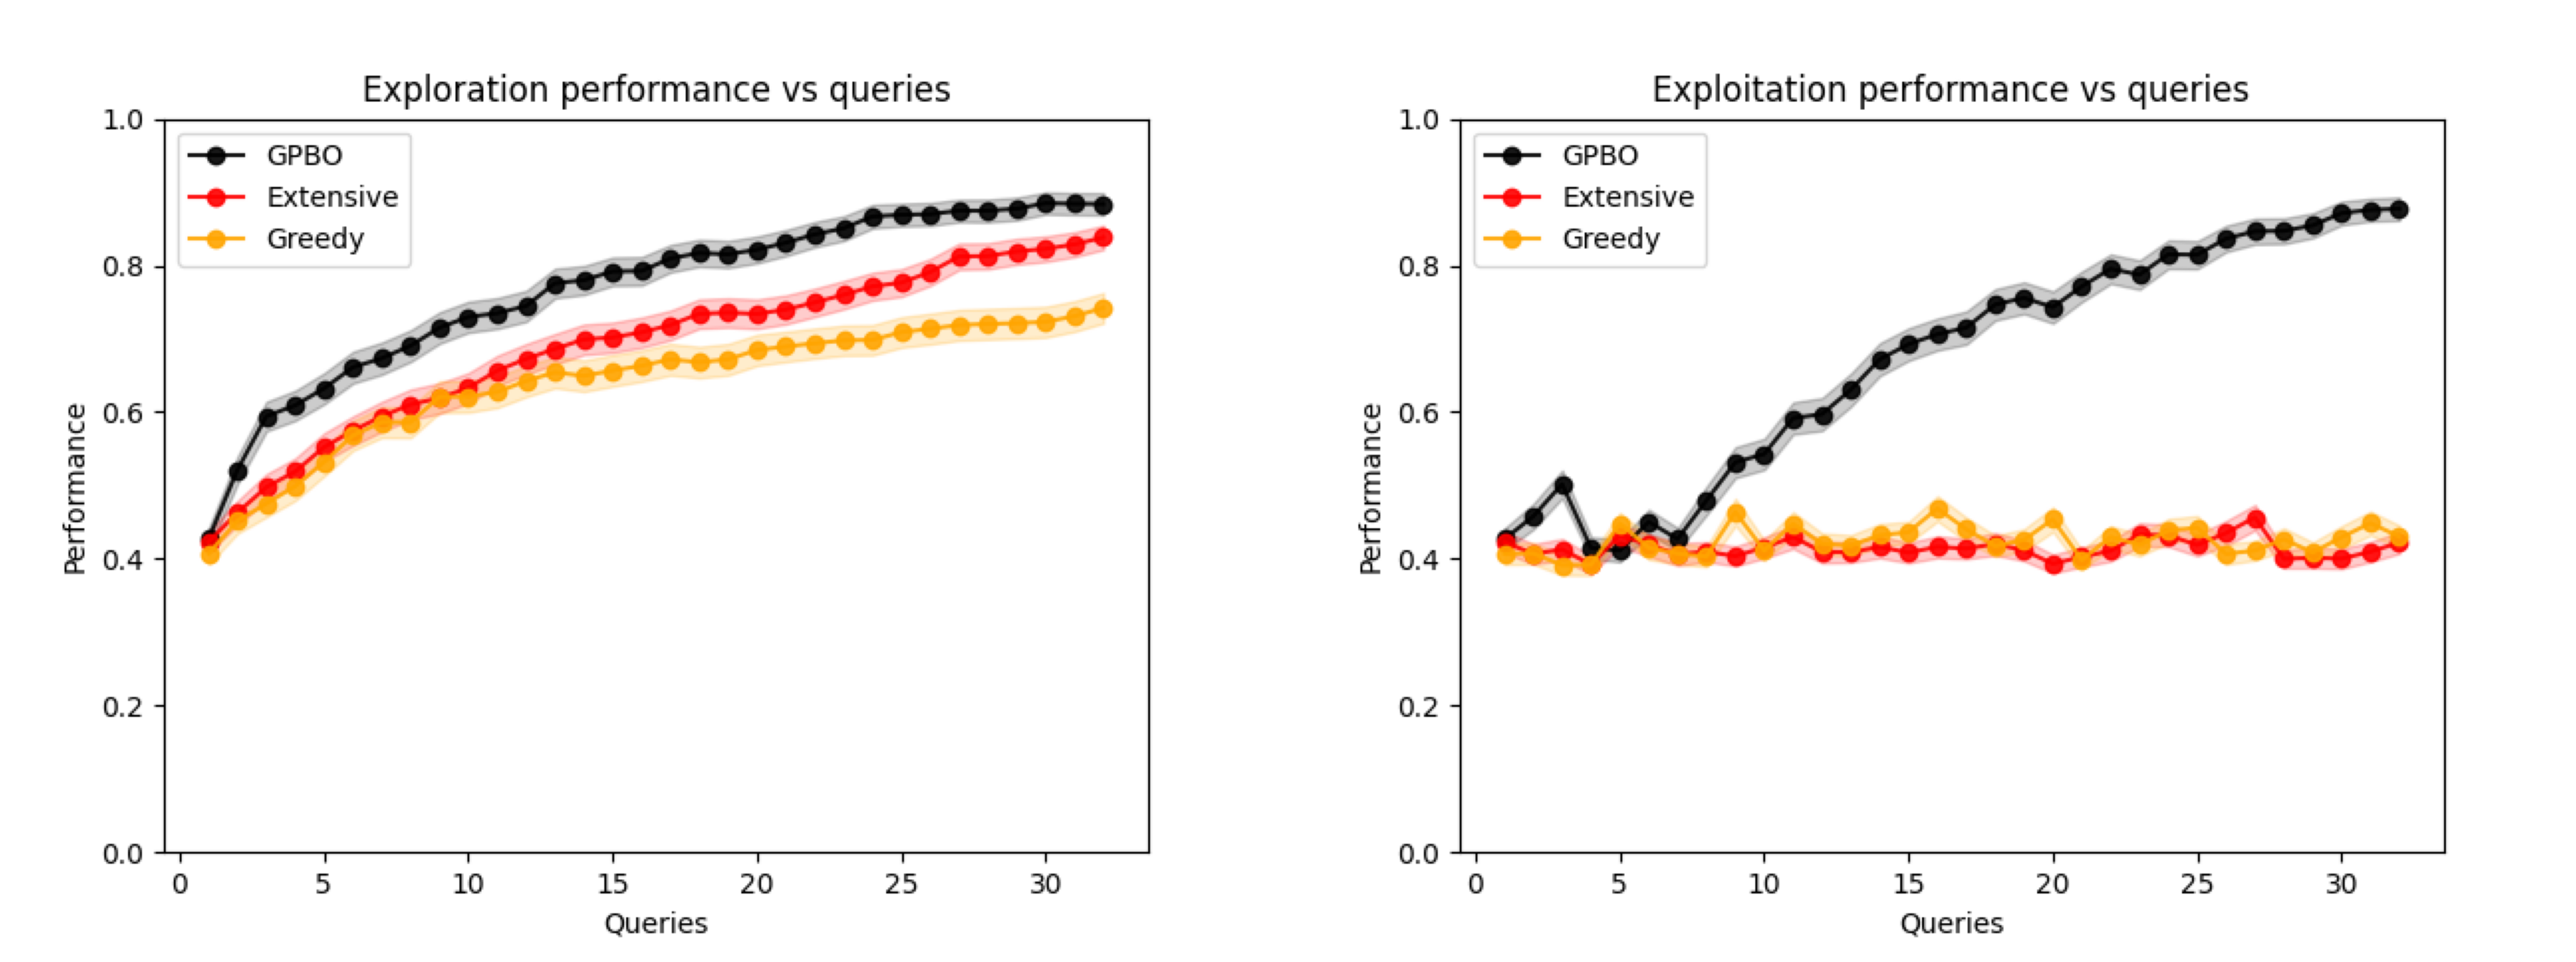

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(50, 30), constrained_layout=True)
ax[0].imshow(PIL_Image.open('output/rat_mapping_treadmill_2D_several_animals/exploration_comparison.png'))
ax[0].axis('off')
ax[1].imshow(PIL_Image.open('output/rat_mapping_treadmill_2D_several_animals/exploitation_comparison.png'))
ax[1].axis('off')
plt.show()

## Running validation on all replicates

In [1]:
!python main.py -c config/rat_mapping_treadmill_2D.json \
                -op output/rat_mapping_treadmill_2D_all \
                -hp "{'kappa': 3.0}" \
                -val 

python: can't open file 'main.py': [Errno 2] No such file or directory


In [19]:
!python main.py -c config/rat_mapping_treadmill_2D.json \
                -alg extensive \
                -op output/rat_mapping_treadmill_2D_all_extensive \
                -hp "{'kappa': 3.0}" \
                -val 

Dataset (sub:muscle):  ['rat5_M1_191112:0', 'rat3_M1_190728:0', 'rat2_M1_190617:0', 'rat1_M1_190716:0', 'rat6_M1_200218:0', 'rat4_M1_191109:0']
Iterating over repetitions:   0%|                        | 0/30 [00:00<?, ?it/s] main.py:469: RuntimeWarning:Mean of empty slice
Hooray! Succesfully saved output files to output/rat_mapping_treadmill_2D_all_extensive.


In [20]:
!python main.py -c config/rat_mapping_treadmill_2D.json \
                -alg greedy \
                -op output/rat_mapping_treadmill_2D_all_greedy \
                -hp "{'kappa': 3.0}" \
                -val 

Dataset (sub:muscle):  ['rat5_M1_191112:0', 'rat3_M1_190728:0', 'rat2_M1_190617:0', 'rat1_M1_190716:0', 'rat6_M1_200218:0', 'rat4_M1_191109:0']
Iterating over repetitions:   0%|                        | 0/30 [00:00<?, ?it/s] main.py:469: RuntimeWarning:Mean of empty slice
 /Users/uzaymacar/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:151: RuntimeWarning:invalid value encountered in reduce
Hooray! Succesfully saved output files to output/rat_mapping_treadmill_2D_all_greedy.


In [21]:
!python scripts/compare_and_plot.py -r1 output/rat_mapping_treadmill_2D_all \
                                    -r2 output/rat_mapping_treadmill_2D_all_extensive \
                                    -r3 output/rat_mapping_treadmill_2D_all_greedy

Hooray! Successfully compared and plotted the runs!


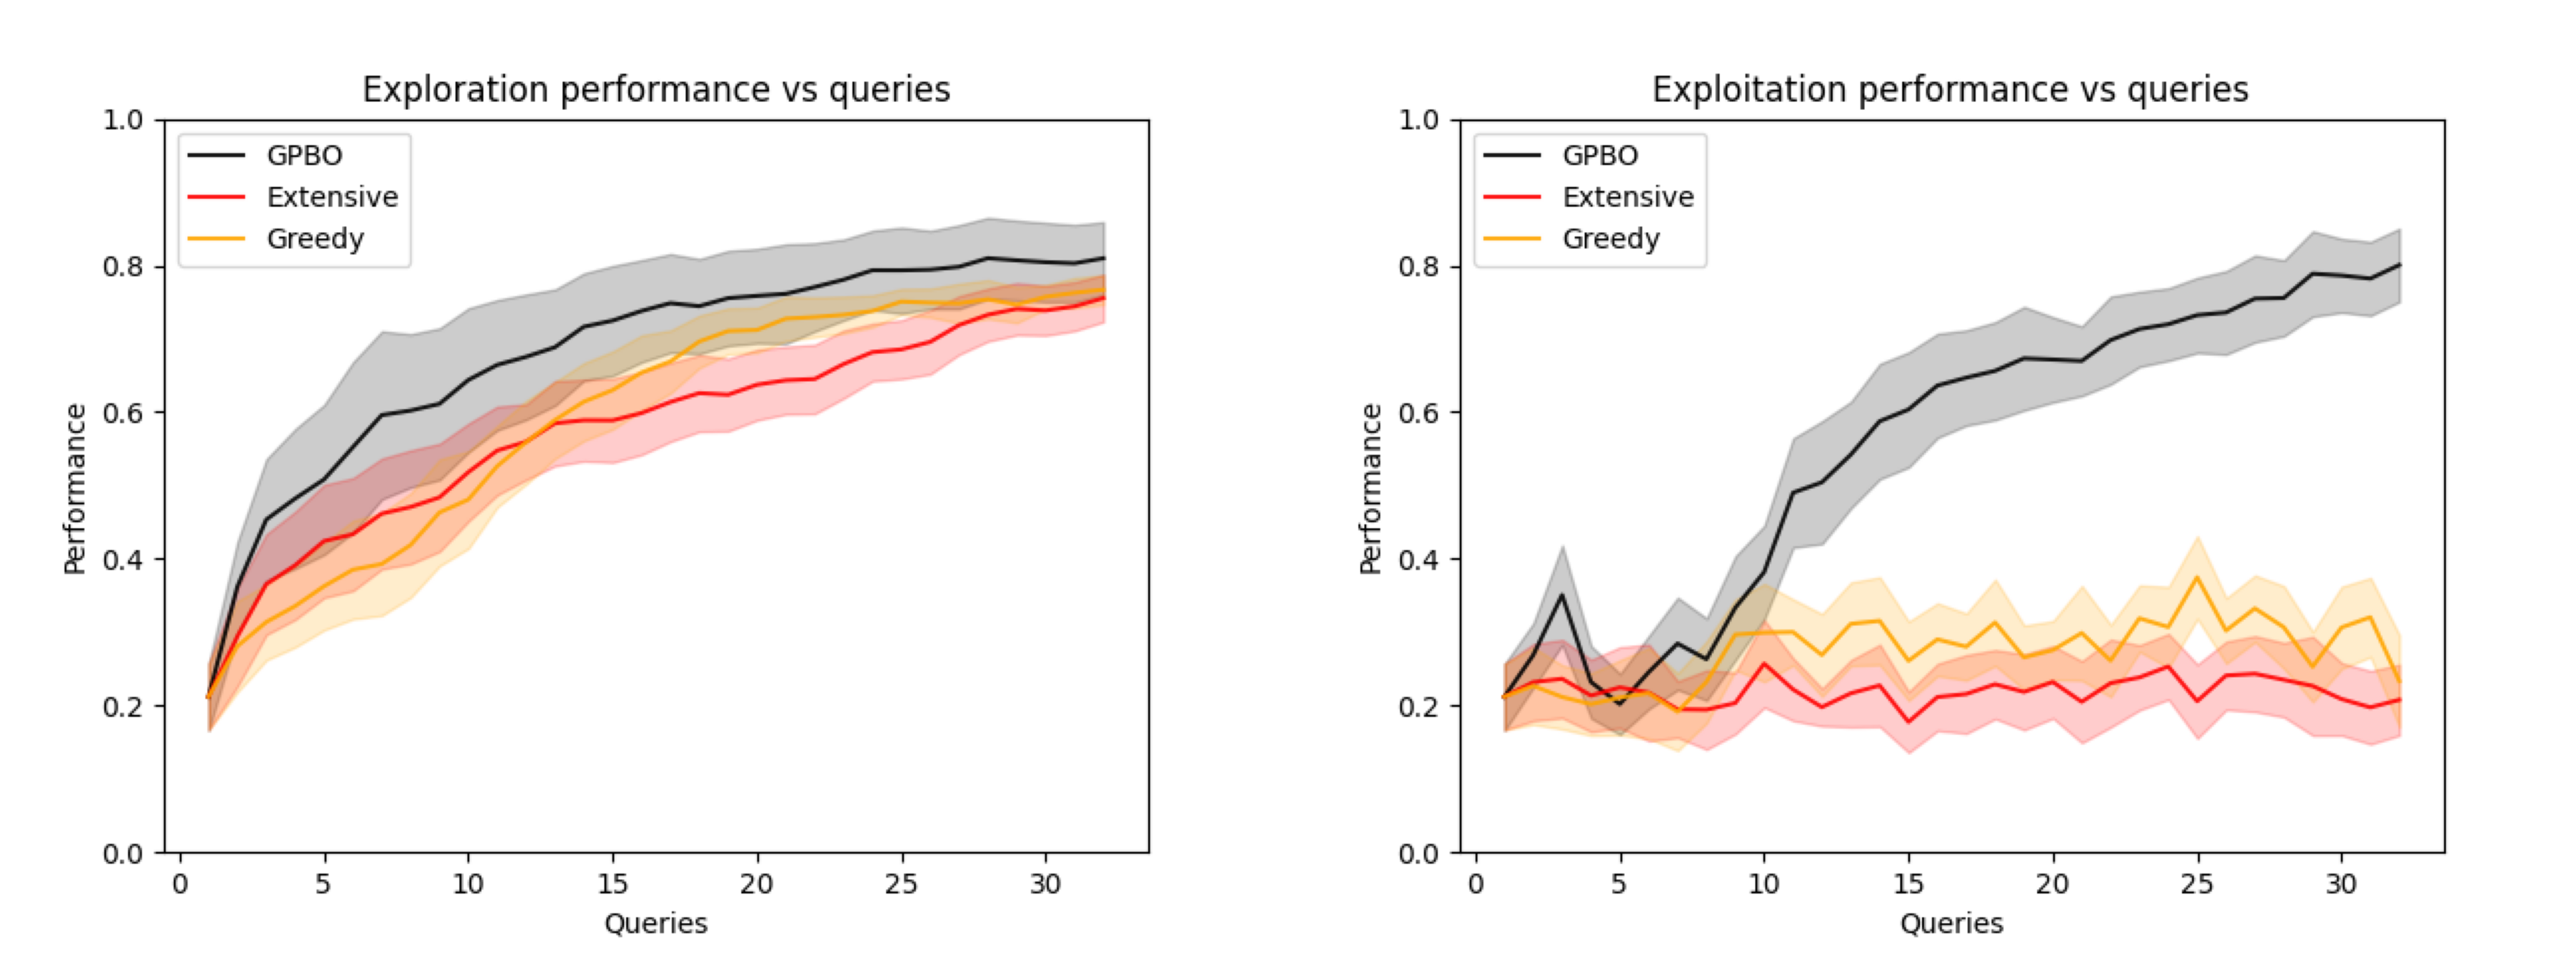

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(50, 30), constrained_layout=True)
ax[0].imshow(PIL_Image.open('output/rat_mapping_treadmill_2D_all/exploration_comparison.png'))
ax[0].axis('off')
ax[1].imshow(PIL_Image.open('output/rat_mapping_treadmill_2D_all/exploitation_comparison.png'))
ax[1].axis('off')
plt.show()

## Step 7: Run offline hyperpamater optimization

Now that we saw how `optim-neurostim` can be utilized to run validation experiments, let's see how we decided on the best value for `kappa`. Now, we will run the command without any additional flags to perform offline hyperparameter optimization. As discussed before, the config file encodes all of the necessary information.

In [ ]:
!python main.py -c config/rat_mapping_treadmill_2D.json \
                -op output/rat_mapping_treadmill_2D

Iterating over repetitions:  57%|████████▌      | 17/30 [00:19<00:14,  1.13s/it] /Users/uzaymacar/anaconda3/lib/python3.7/site-packages/GPy/kern/src/stationary.py:137: RuntimeWarning:overflow encountered in square
 /Users/uzaymacar/anaconda3/lib/python3.7/site-packages/GPy/kern/src/stationary.py:138: RuntimeWarning:invalid value encountered in add
Iterating over repetitions:  23%|███▋            | 7/30 [00:08<00:26,  1.17s/it] /Users/uzaymacar/anaconda3/lib/python3.7/site-packages/GPy/kern/src/stationary.py:166: RuntimeWarning:overflow encountered in true_divide
 /Users/uzaymacar/anaconda3/lib/python3.7/site-packages/paramz/transformations.py:119: RuntimeWarning:overflow encountered in expm1
Iterating over repetitions:   0%|                        | 0/30 [00:00<?, ?it/s]

Let's first see what the algorithmic performance looks like for different values of hyperparameter `kappa`.

In [ ]:
display(Image('output/rat_mapping_treadmill_2D/performance_for_kappa.png'))

This command also gives us a `.pkl` containing the best values for hyperparameters which we can pass onto validation experiments later. Let's investigate this below.

In [ ]:
with open('output/rat_mapping_treadmill_2D/best_hyperparams.pkl', 'rb') as f:
    d = pickle.load(f)

print(d)